# Project work, part 1 - Dashboard



## Github link 
https://github.com/Ditto25/IND320-Steamlit-app.git

## Streamlit link
https://ind320-steamlit-app-ditto.streamlit.app/

In [22]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt 

# Read the supplied CSV file using Pandas.
file_csv = 'DataApp/open-meteo-subset.csv'


# Print its contents in a relevant way.
df = pd.read_csv(file_csv, parse_dates=["time"])        # load in the file and make time real datetimes
df = df.set_index("time").sort_index()                  # sort by time and make it index
df.head()                                               # show the the first 5 rows

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
time,,,,,
2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284


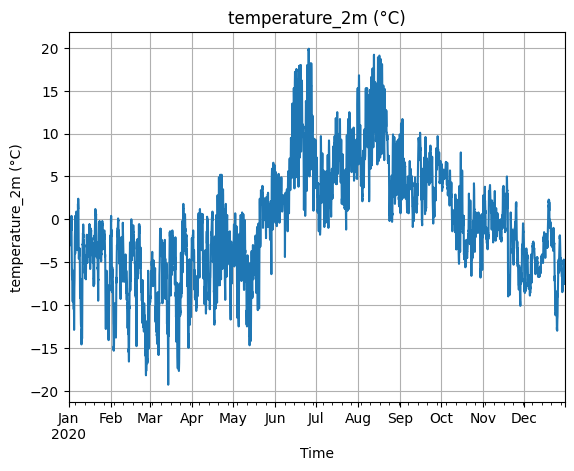

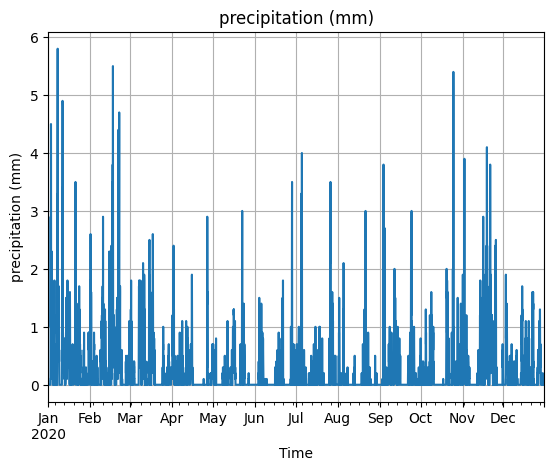

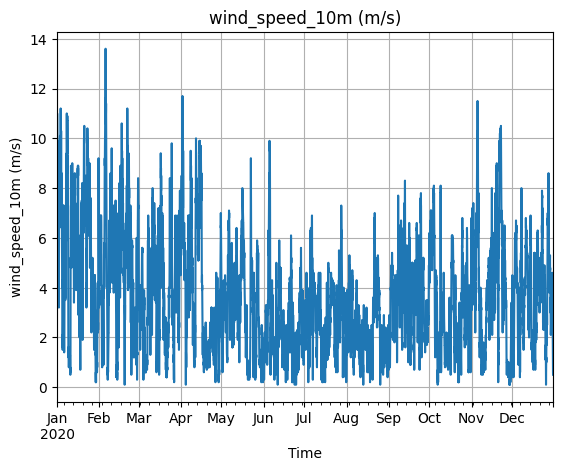

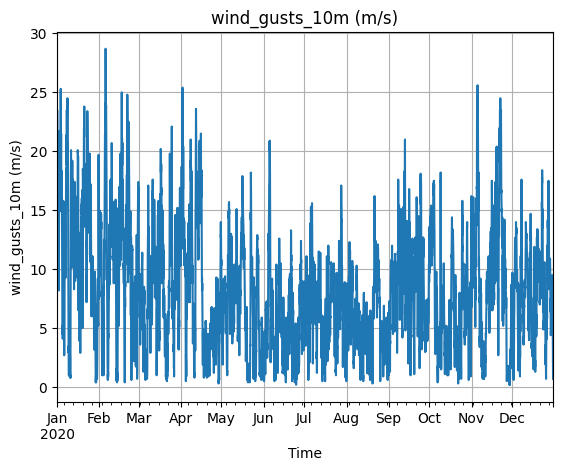

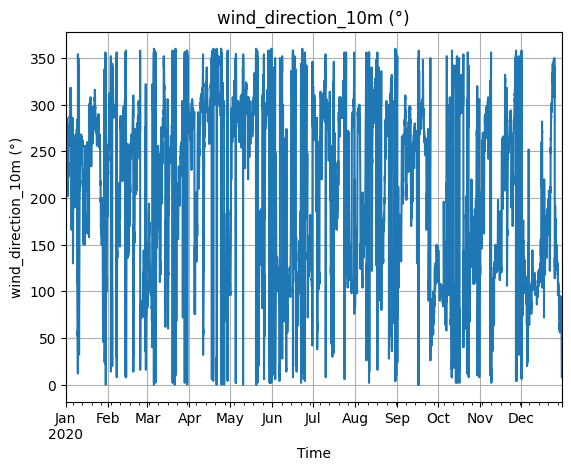

In [23]:
# Plot each column separately.
for column in df.columns:
    plt.figure()
    df[column].plot(title=column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

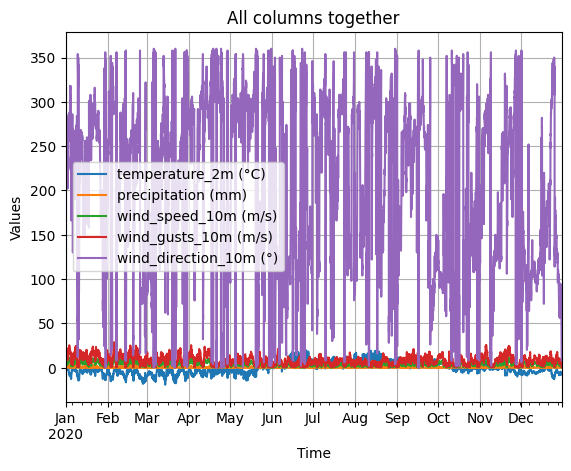

In [24]:
# Plot all columns together. 
# Consider how to make this natural, given that the scales are different.
df.plot(title="All columns together")
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()


With some help of some AI, I made the plot more suited for each variable. 

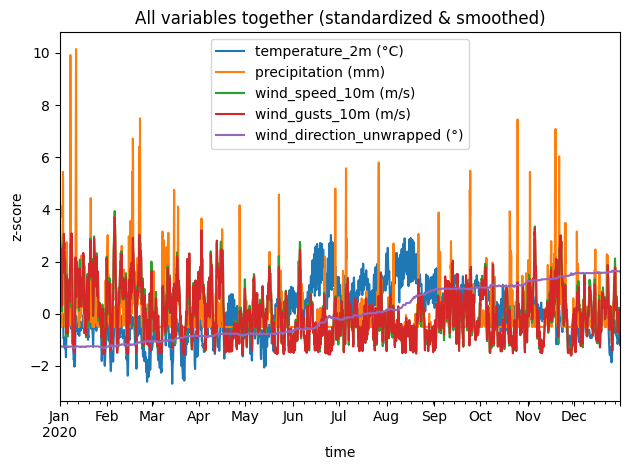

In [25]:
# --- Plot all variables together with wind direction unwrapped and smoothed ---
# 1. Define the name of the wind direction column
#    and get a list of all other columns (normal variables)
import numpy as np


direction_col = "wind_direction_10m (°)"
normal_cols = [c for c in df.columns if c != direction_col]

# 2. Unwrap wind direction so that jumps from 360 to 0 degrees don't create spikes
#    - Convert degrees to radians
#    - Use np.unwrap to remove artificial jumps
#    - Convert back to degrees
rad = np.deg2rad(df[direction_col].to_numpy())
direction_unwrapped = np.rad2deg(np.unwrap(rad))

# 3. Combine the normal columns and the unwrapped wind direction into a new DataFrame
all_df = df[normal_cols].copy()
all_df["wind_direction_unwrapped (°)"] = direction_unwrapped

# 4. Smooth all columns using a rolling mean (window size 5)
all_df_smooth = all_df.rolling(window=5, min_periods=1).mean()

# 5. Standardize (z-score) all columns so they are comparable on the same y-axis
Z = (all_df_smooth - all_df_smooth.mean()) / all_df_smooth.std(ddof=0)

# 6. Plot all standardized, smoothed variables together
Z.plot()
plt.title("All variables together (standardized & smoothed)")
plt.xlabel("time")
plt.ylabel("z-score")
plt.tight_layout()
plt.show()

## Workload

To begin, I created a GitHub repository and transferred it to GitHub Desktop, since I am not very experienced with Git. After developing the application, I was able to run it locally with success before attempting deployment through Streamlit.

Working with Jupyter Notebook presented few problems, as I already had some experience with the format from earlier courses. The main challenge was designing a graph that could be suitable for all variables in the dataset.

Deploying the application with Streamlit, however, was more complicated. At first, I did not realize that the GitHub repository needed to be public, and that pages had to be numbered in a specific way. These requirements caused some difficulties during deployment.

Despite these issues, the application worked smoothly when tested locally, and I am satisfied with the result. One important lesson I learned during testing was to avoid interacting with all buttons at once, as this could cause unexpected behavior.

## Use Of AI

When working on this project, I encountered some difficulties with the software setup and creating a Streamlit account. With the help of AI-generated prompts, I was able to solve these issues.

Throughout the development, I primarily used GitHub Copilot to assist with coding and ChatGPT to resolve specific complications related to Streamlit.

Although I have not succeeded in fully implementing the application in Streamlit, I am unsure if this is possible in its current state. This might require changes in the future.

In addition to technical troubleshooting, AI tools also helped me with:

- Debugging and optimization: Identifying errors in the code and suggesting improvements.

- Documentation and explanation: Providing clearer descriptions of functions and workflows.

- Learning support: Offering step-by-step guidance when I encountered unfamiliar concepts.

Overall, AI served as both a coding assistant and a learning resource, making the development process more efficient even though some limitations remained.

The code generated by AI was often of higher quality than what I was able to develop on my own, which sometimes made me rely on it too heavily. While the suggestions were generally good, there were cases where the code did not work as expected and required adjustments.

To better understand the code produced with AI assistance, I made an effort to write clear comments. This practice was especially helpful in improving my own learning process and ensuring that I could follow the logic behind the solutions.